In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
rawdata = pd.read_csv('dataset.dat')
title_text = "US Public Opinion of Vote By Mail"

x_str='Demographic'
y0_str = 'The US should allow all voters to vote by mail in elections this year to minimize the spread of the coronavirus'
y1_str = 'The US should not allow all voters to vote by mail in elections this year because it jeopardizes election security'
y2_str = 'Don\'t Know or No Opinion'

caption_txt = '''
    Source: Politico Survey of 1991 Registered Voters, July/Aug 2020
    
    Link: https://www.politico.com/f/?id=00000173-ba40-db2c-ad77-fa57c8a30000
    
    Exact Wording:
        ''' + y0_str + '\n' + '''
        ''' + y1_str + '\n' + '''
        ''' + y2_str + '\n'

In [3]:
# Give us a more usable interface than the exact question wording

data = rawdata.rename(columns={x_str:'group', y0_str:'support', y1_str:'oppose', y2_str:'none'})
data

,group,support,oppose,none
0,Registered voters,58,31,11
1,Dem no Lean,81,10,8
2,Ind no Lean,57,27,17
3,Rep no Lean,33,57,11


In [4]:
sns.set()

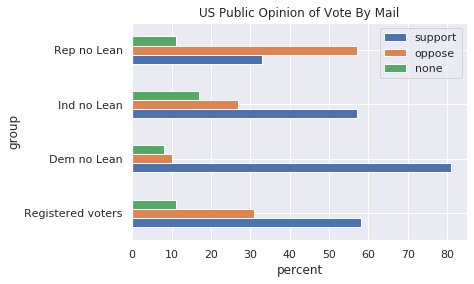

In [5]:
data.plot(kind='barh',
          x='group',
          y=['support','oppose','none'],
          legend='upper right')
plt.xlabel('percent')
plt.title(title_text)
plt.show()

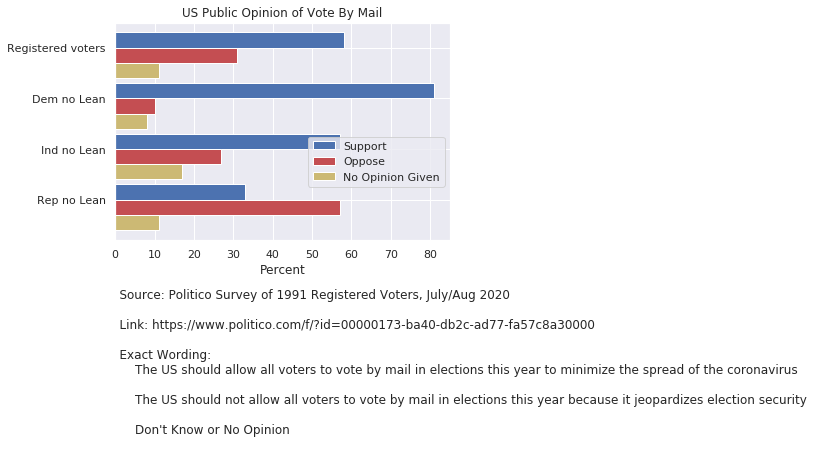

In [20]:
N = 4

ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig, ax = plt.subplots()

support_pct = data['support']
support_bars = ax.barh(ind, support_pct, width, color='b')

oppose_pct = data['oppose']
oppose_bars = ax.barh(ind + width, oppose_pct, width, color='r')

none_pct = data['none']
none_bars = ax.barh(ind+width*2, none_pct, width, color='y')

ax.set_xlabel('Percent')
ax.set_title(title_text)
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(data['group'])

ax.legend((support_bars[0], oppose_bars[0], none_bars[0]),
          ('Support', 'Oppose', 'No Opinion Given'),
         loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
fig.text(0.1, -0.6, caption_txt)

ax.invert_yaxis()

plt.show()